# GRIP @ THE SPARKS FOUNDATION


# NAME-KANCHARLA NITHIN


# BATCH-JUNE 2022


# TASK-1 Prediction using Supervised ML

### (LEVEL_BEGINNER)

- Predict the percentage of an student based on the no. of study hours.
- What will be predicted score if a student studies for 9.25 hrs/day.
- Use R, Python, SAS Enterprise Miner or any other tool.

The aim is to predict the **percentage** obtained by a student based on the number of hours studied by the student

Importing libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Importing data

In [2]:
url="http://bit.ly/w-data"
df=pd.read_csv(url)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Exploratory data analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [9]:
df.isnull().sum() # Checking if there are any null values

Hours     0
Scores    0
dtype: int64

Visualizing the data

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

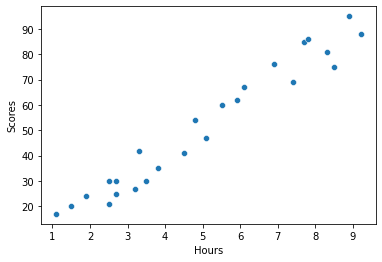

In [7]:
sns.scatterplot(data=df,x='Hours',y='Scores')

We can see that there is  positive linear relationship as hours increase  linearly scores also increase linearly

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

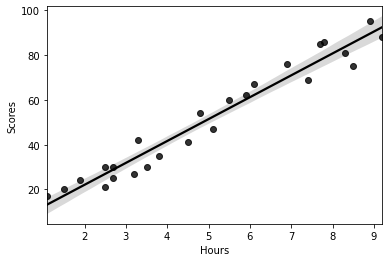

In [8]:
sns.regplot(data=df,x='Hours',y='Scores',color='black')

In [23]:
X=np.reshape(df['Hours'].values,(-1,1)) #Feature .reshape(-1,1) as it has a single feature
y=df['Scores'] #Label

Preparing data for training and testing

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

Checking number of instances for training and testing

In [52]:
len(X_train)

20

In [53]:
len(X_test)

5

Importing and training the model

In [54]:
from sklearn.linear_model import LinearRegression

In [55]:
linreg_model=LinearRegression()

Training the model

In [56]:
linreg_model.fit(X_train,y_train)

LinearRegression()

In [57]:
linreg_model.coef_

array([9.68207815])

In [58]:
linreg_model.intercept_

2.826892353899737

Predicting values

In [59]:
y_preds=linreg_model.predict(X_test)

In [60]:
y_preds

array([83.18814104, 27.03208774, 27.03208774, 69.63323162, 59.95115347])

### plotting the regression line

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

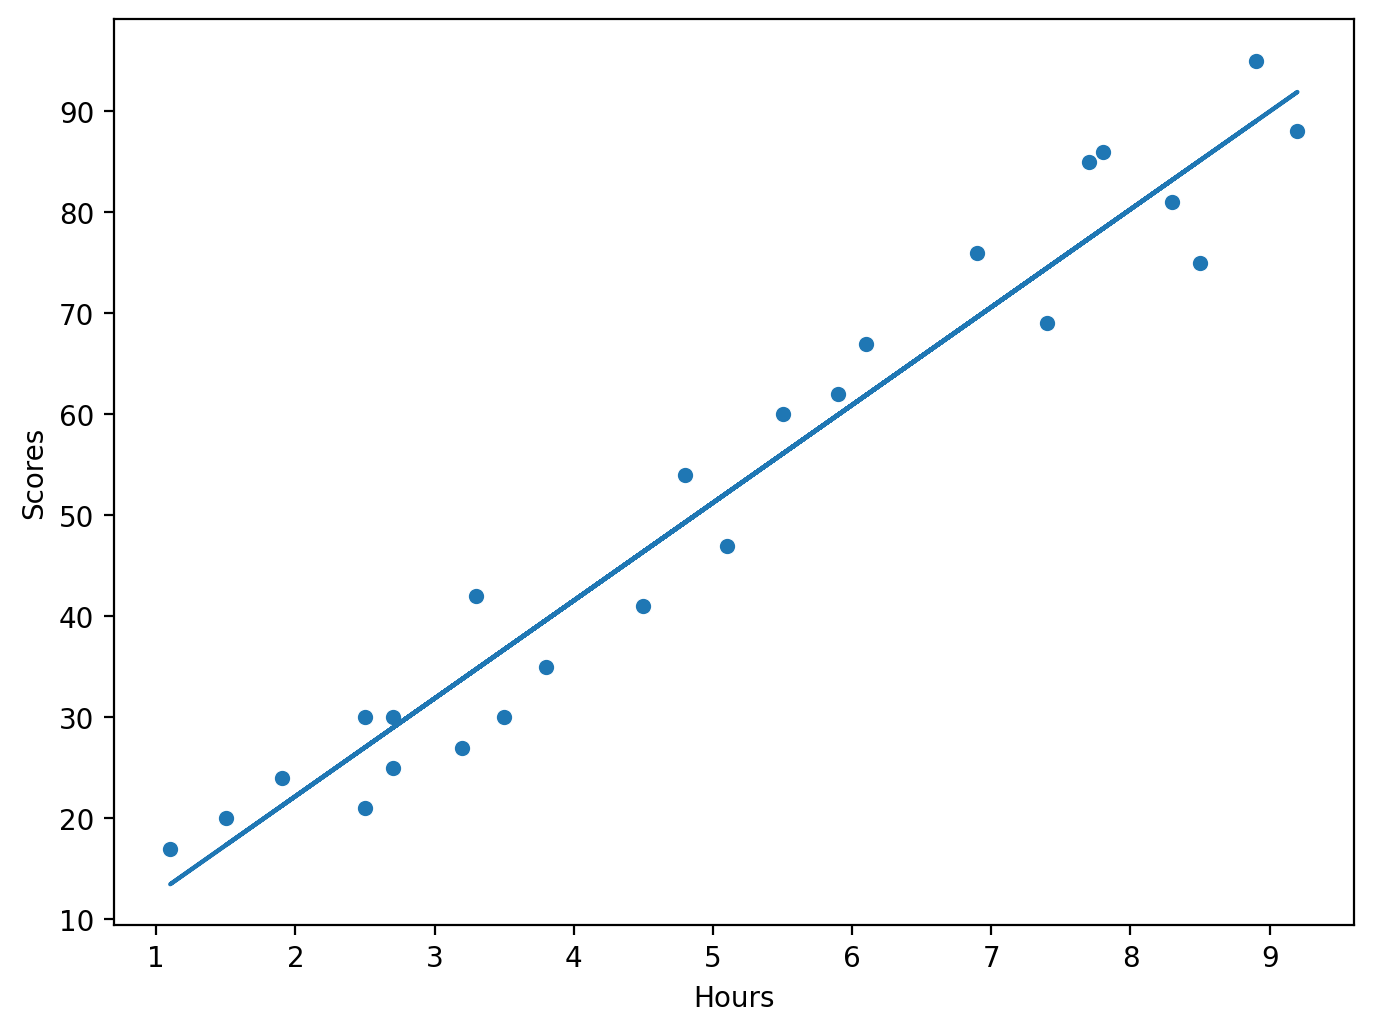

In [61]:
plt.figure(figsize=(8,6),dpi=200)
reg_line=linreg_model.coef_*(df['Hours'].values)+linreg_model.intercept_
plt.plot(df['Hours'].values,reg_line)
sns.scatterplot(data=df,x='Hours',y='Scores')

Predicting a given value

In [62]:
hours=9.25
pred=linreg_model.predict([[hours]])
print(f'The predicted score by studying {hours} is={pred}')

The predicted score by studying 9.25 is=[92.38611528]


Model Evaluation

In [63]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [64]:
mae=mean_absolute_error(y_test,y_preds)
print('Mean absolute Error= ',mae)

Mean absolute Error=  3.9207511902099244


In [65]:
mse=mean_squared_error(y_test,y_preds)
print('Mean Square Error: ',mse)

Mean Square Error:  18.943211722315272


In [66]:
rmse=np.sqrt(mean_squared_error(y_test,y_preds))
print('Root Mean Square Error: ',rmse)

Root Mean Square Error:  4.352380006653288


In [67]:
print('r2_score: ',r2_score(y_test,y_preds))

r2_score:  0.9678055545167994


# THANK YOU!